# DIABETES 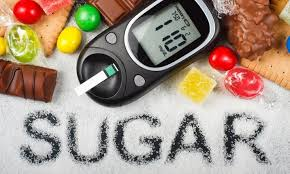

## **use machine learning to create a model that predicts which diabetes diseas**

## **The project utilizes a dataset containing health information of individuals**
## **including attributes such as age, BMI (Body Mass Index), blood pressure**
## ** glucose levels, family history of diabetes, and other relevant features**.
## **The dataset is labeled, with each instance labeled as either "diabetic" or "non-diabetic"**

In [ ]:
DIABETES

use machine learning to create a model that predicts which diabetes diseas

The project utilizes a dataset containing health information of individuals
including attributes such as age, BMI (Body Mass Index), blood pressure
glucose levels, family history of diabetes, and other relevant features.
The dataset is labeled, with each instance labeled as either "diabetic" or "non-diabetic

In [59]:
import pandas as pd
import numpy as pn
import matplotlib.pyplot as plt
import seaborn as ses
import plotly.express as px

import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler

In [60]:
data=pd.read_csv(r'diabetes.csv')


In [61]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Explore data

In [62]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
460,9,120,72,22,56,20.8,0.733,48,0
358,12,88,74,40,54,35.3,0.378,48,0
123,5,132,80,0,0,26.8,0.186,69,0
284,2,108,80,0,0,27.0,0.259,52,1
239,0,104,76,0,0,18.4,0.582,27,0


In [63]:
data.shape

(768, 9)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [65]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

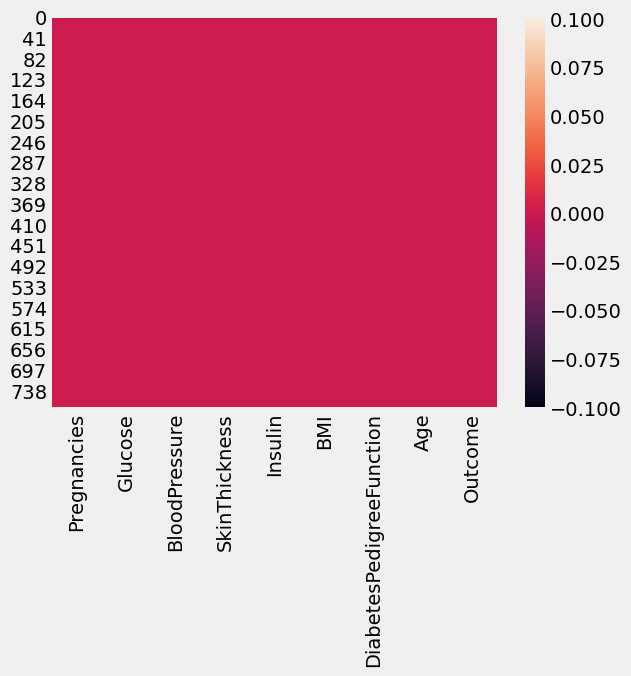

In [66]:
data.isnull().sum()
ses.heatmap(data.isnull())

In [67]:
data.duplicated().sum()

0

# process data

In [68]:
from sklearn.preprocessing import LabelEncoder 
la=LabelEncoder()
data1=data.select_dtypes(include='object')
data2=data.select_dtypes(exclude='object')
for i in range (0,data1.shape[1]):
    data1.iloc[:,i]=la.fit_transform(data1.iloc[:,i])
    data=pd.concat([data1,data2],axis=1)

In [69]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [70]:
#from sklearn.decomposition import PCA

In [71]:
#PCAA=PCA(n_components=11)
#data=PCAA.fit_transform(data)

In [72]:
#data=pd.DataFrame(data)

# analysis data 

In [73]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: >

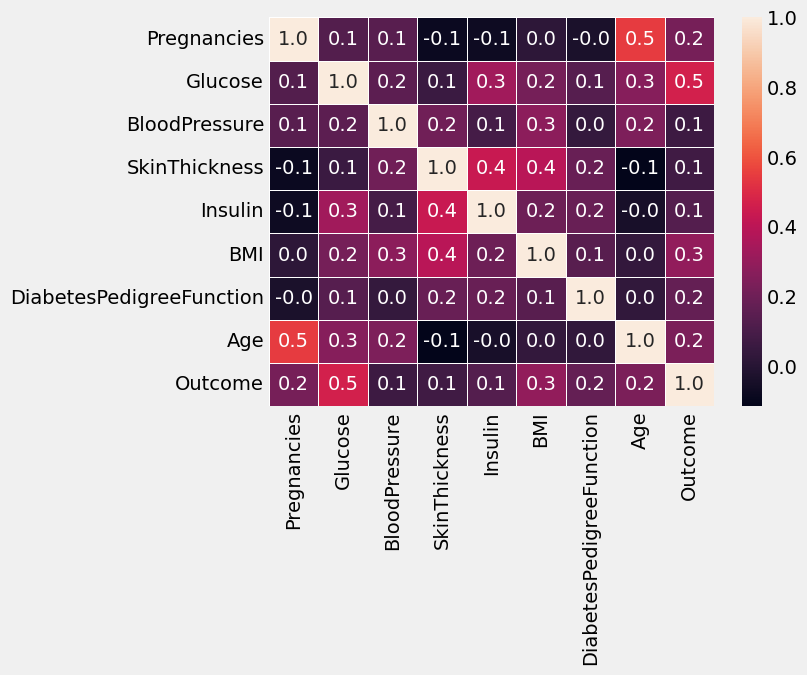

In [74]:
cor=data.corr()
ses.heatmap(cor,fmt='.1f',annot=True,linewidth=.5)

<function matplotlib.pyplot.show(close=None, block=None)>

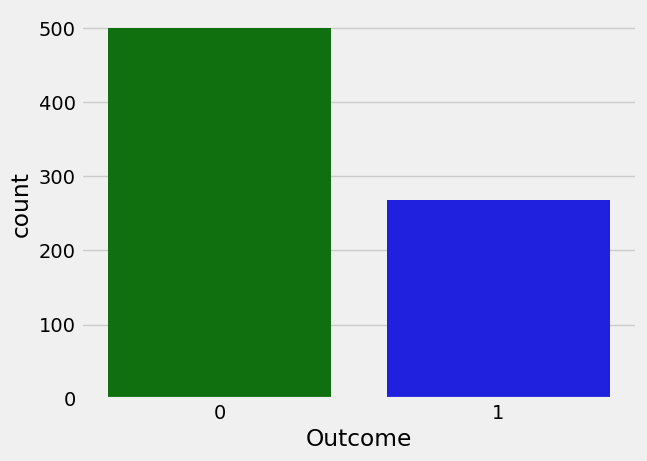

In [76]:
ses.countplot(data=data,x='Outcome',palette=['g','b'])
plt.show

In [77]:
f=plt.figure(figsize=(8,8))

<Figure size 800x800 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

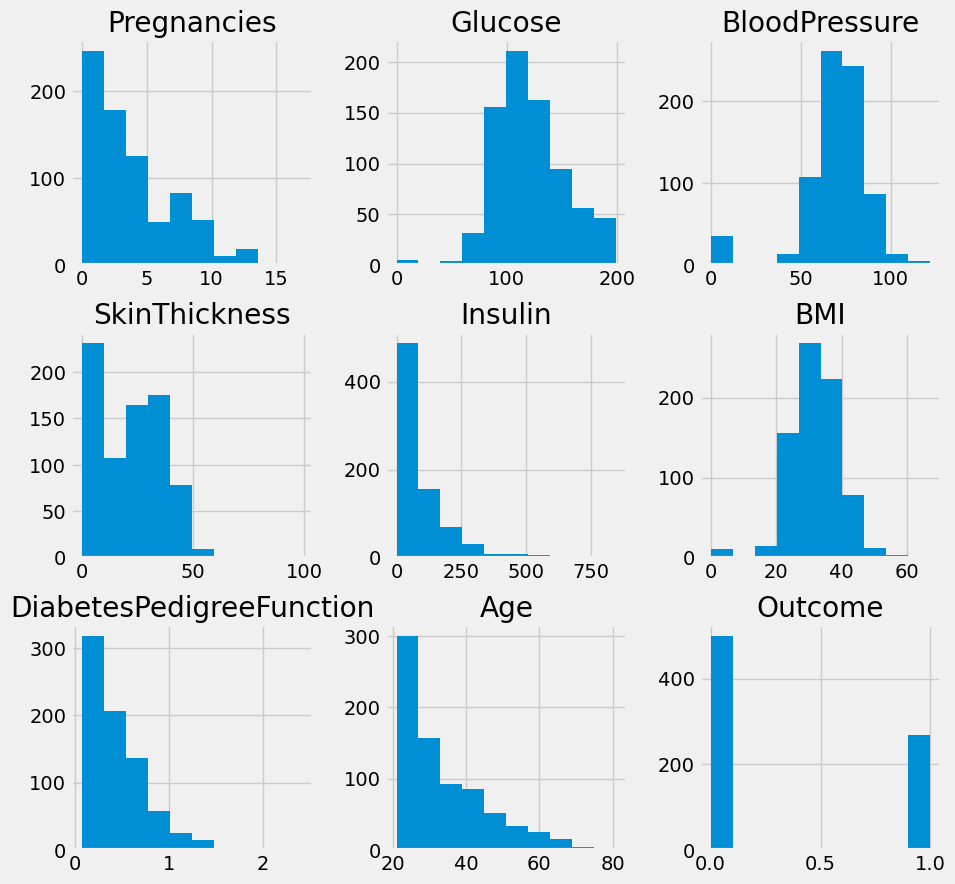

In [38]:
data.hist(figsize=(10,10))
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

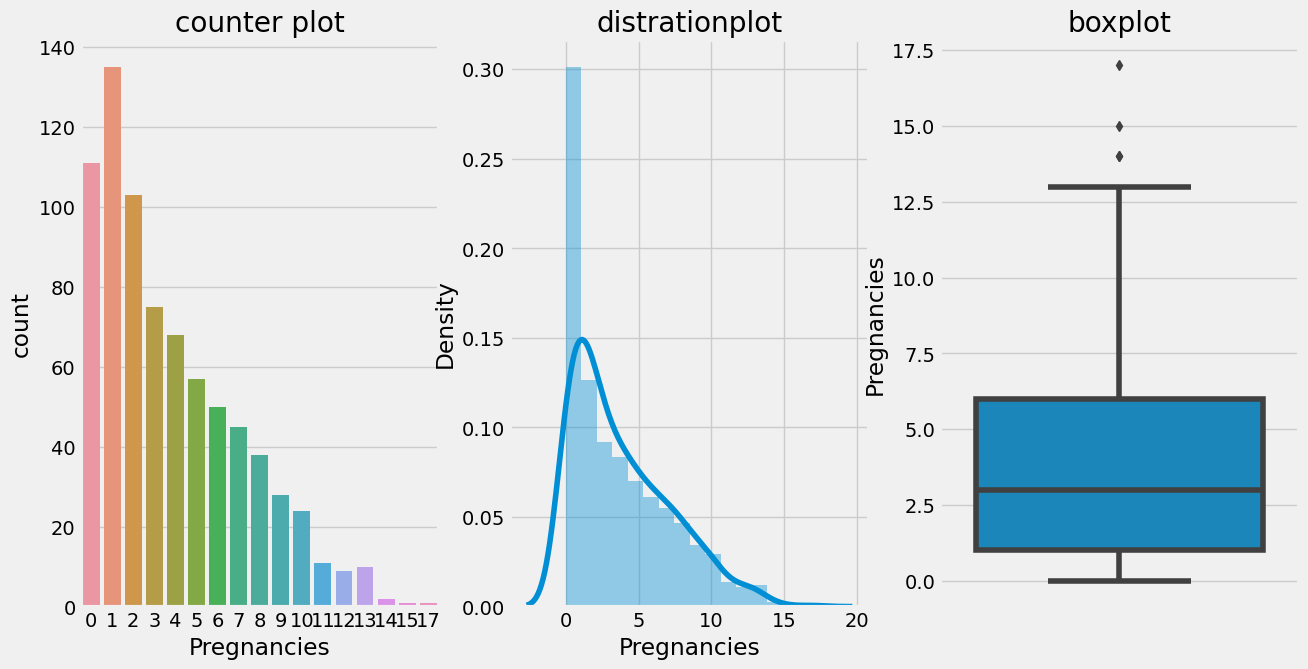

In [39]:
plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
ses.countplot(x='Pregnancies',data=data)
plt.title('counter plot')

plt.subplot(1,3,2)
ses.distplot(data['Pregnancies'])
plt.title('distrationplot')
 
plt.subplot(1,3,3)
ses.boxplot(y=data["Pregnancies"])
plt.title('boxplot')    

plt.show

# create model

In [40]:
data.to_csv('diabete.csv',index=False)

In [41]:
x=data.drop(['Outcome'],axis=1)
y=data.Outcome

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8)

In [43]:
model1=GradientBoostingClassifier()
model2=RandomForestClassifier()
model3=LogisticRegression()

In [44]:
algrothm=['GradientBoostingClassifier','RandomForestClassifier','LogisticRegression']

In [45]:
columns=algrothm

In [46]:
f_=[]
accuracyes__=[]

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
def models (model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    f1=recall_score(y_test,pre)
    accuracy=accuracy_score(y_test,pre)
    accuracyes__.append(accuracy)
    f_.append(f1)
    ses.heatmap(confusion_matrix(y_test,pre),annot=True)
    print('accuracy is :',accuracy,'recall_score is :',f1)
    

accuracy is : 0.7207792207792207 recall_score is : 0.6037735849056604


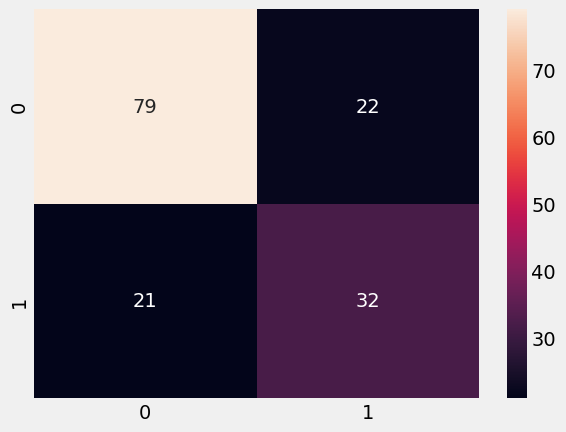

In [49]:
models(model1)

accuracy is : 0.7207792207792207 recall_score is : 0.5283018867924528


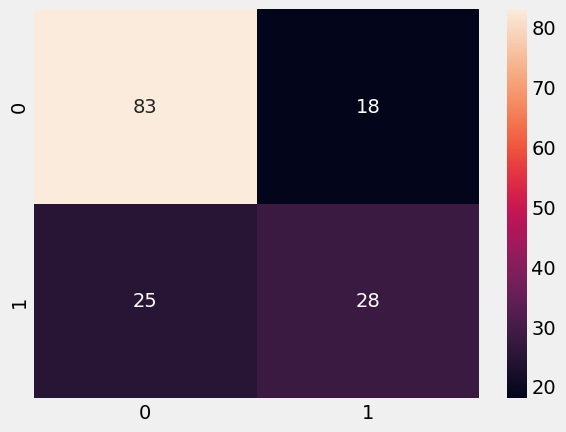

In [50]:
models(model2)

accuracy is : 0.7402597402597403 recall_score is : 0.5471698113207547


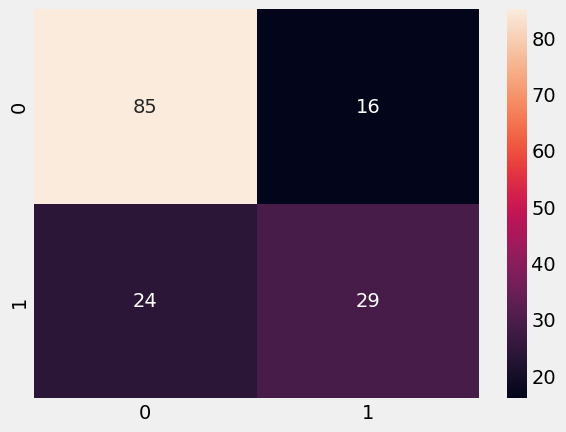

In [51]:
models(model3)

In [52]:
finalresult=pd.DataFrame({'algrothm':columns,'accuracy':accuracyes__,'f_recall':f_})

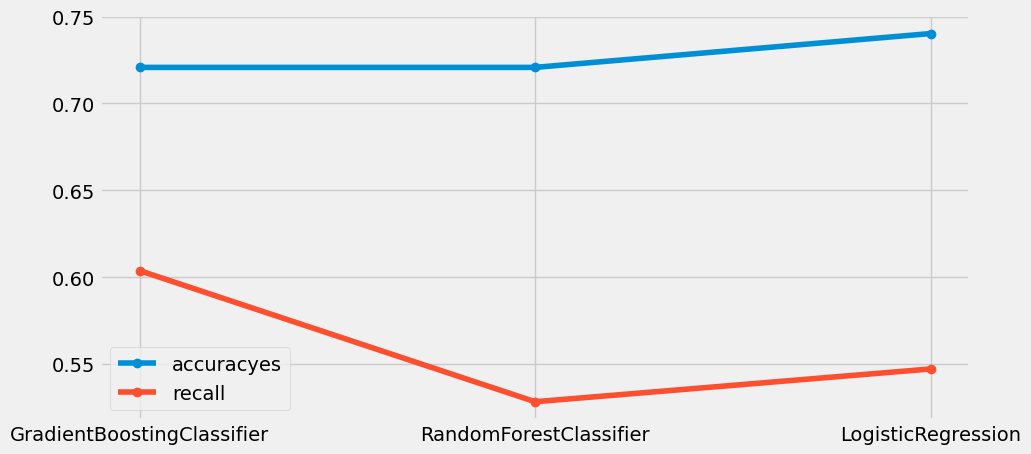

In [53]:
plt.figure(figsize=(10,5))
plt.plot(finalresult.algrothm,accuracyes__,marker='o',label='accuracyes')
plt.plot(finalresult.algrothm,f_,marker='o',label='recall')
plt.legend()

In [57]:
#os.mkdir('diabetes')
data.to_csv('diabete.csv',index=False)

In [55]:
#os.path.join()

In [56]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
